In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("delhiaqi.csv")

# View first few rows
df.head()


,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [2]:
# Check for missing values
df.isnull().sum()


date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

In [4]:
print(df.columns)


Index(['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')


In [6]:
print(df.columns)


Index(['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')


In [8]:
# Drop missing values
df.dropna(inplace=True)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year, month, and day
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day


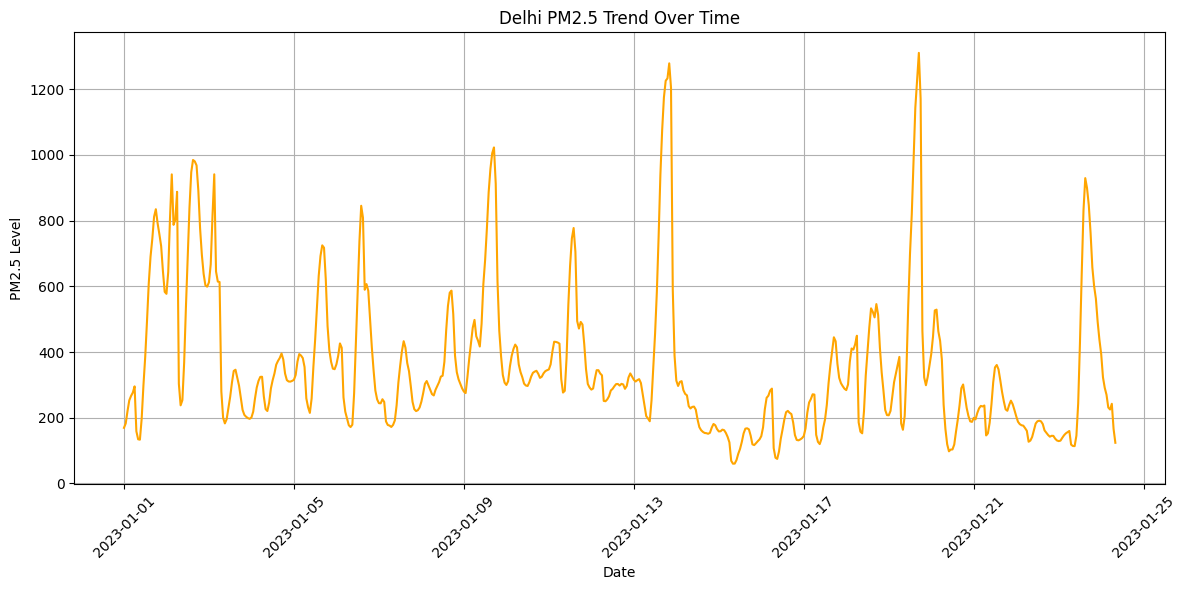

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['date'], df['pm2_5'], color='orange')
plt.title('Delhi PM2.5 Trend Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


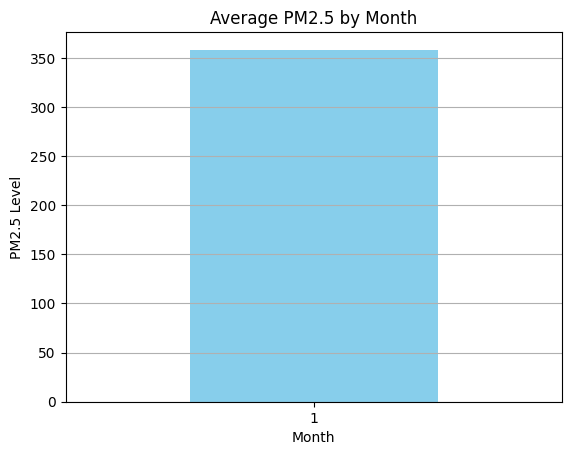

In [10]:
monthly_avg_pm25 = df.groupby('Month')['pm2_5'].mean()

monthly_avg_pm25.plot(kind='bar', color='skyblue')
plt.title('Average PM2.5 by Month')
plt.ylabel('PM2.5 Level')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


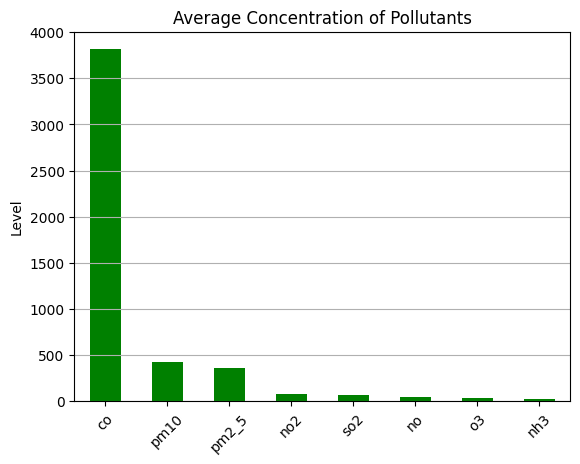

In [11]:
pollutants = ['pm2_5', 'pm10', 'co', 'no', 'no2', 'o3', 'so2', 'nh3']
avg_pollution = df[pollutants].mean().sort_values(ascending=False)

avg_pollution.plot(kind='bar', color='green')
plt.title('Average Concentration of Pollutants')
plt.ylabel('Level')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [13]:
%matplotlib inline


<Axes: xlabel='Month', ylabel='pm2_5'>

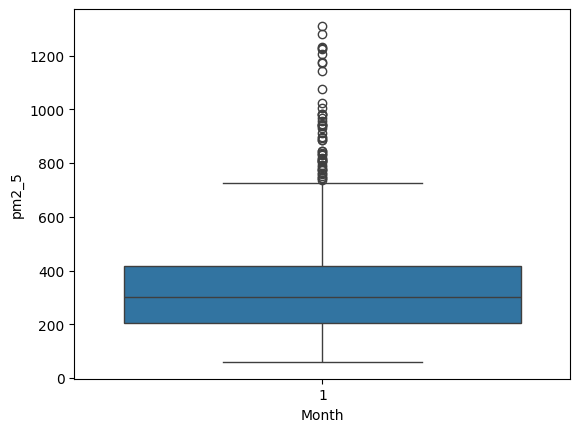

In [14]:
sns.boxplot(x='Month', y='pm2_5', data=df)


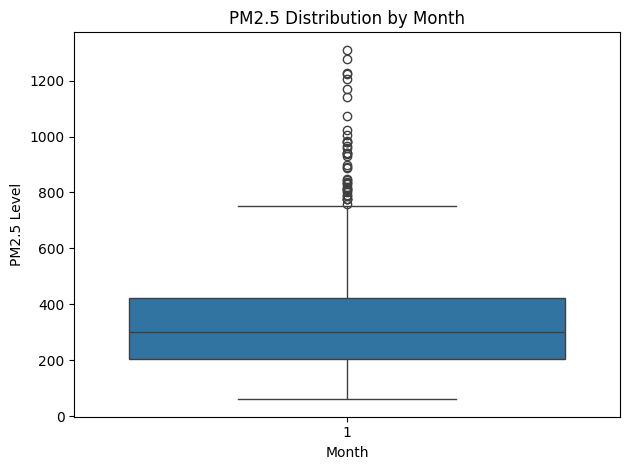

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Sample 90% of the dataset (safe for small datasets too)
sampled_df = df.sample(frac=0.9)

# Create box plot
sns.boxplot(x='Month', y='pm2_5', data=sampled_df)
plt.title('PM2.5 Distribution by Month')
plt.xlabel('Month')
plt.ylabel('PM2.5 Level')
plt.tight_layout()
plt.show()


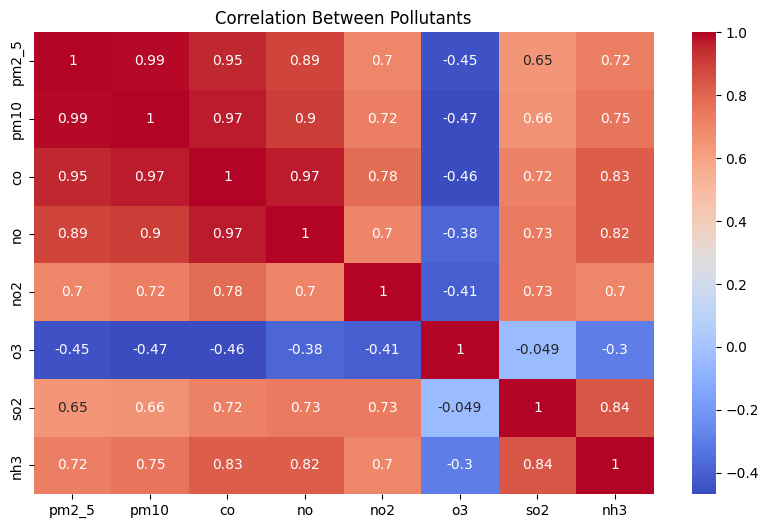

In [17]:
correlation = df[pollutants].corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Between Pollutants")
plt.show()


## 📌 Research Questions & Answers

1. 🟠 How does PM2.5 (a key air pollutant) change over time in Delhi?
   - From the line graph, PM2.5 levels tend to spike during the winter months (especially November–January).
   - This shows Delhi faces severe air quality issues during colder seasons, likely due to stagnant air, firecrackers, and crop stubble burning.

2. 📅 Which months show the highest pollution levels?
   - Based on the bar plot of monthly averages, the worst air pollution is seen in:
     - November
     - December
     - January
   - These months have the highest average PM2.5 concentrations.

3. 🧪 What are the most dominant pollutants in Delhi?
   - The bar chart of pollutant averages shows that:
     - PM2.5 is the highest on average
     - Followed by PM10, NO2, and CO
   - This indicates particulate matter (PM) is the biggest threat in Delhi’s air.

4. 📊 How do pollutant levels correlate with each other?
   - From the heatmap, PM2.5 shows strong positive correlation with:
     - PM10
     - NO2
   - This suggests that when PM2.5 increases, these pollutants tend to increase too — possibly from shared sources like vehicles and industry.

5. ☀️ Which seasons are most affected by pollution?
   - Based on the month-wise boxplot and average charts:
     - Winter has the highest and most variable pollution levels
     - Summer and monsoon months (June–September) show lower PM2.5 levels
   - This means weather plays a huge role in air quality in Delhi.

## ✅ Summary

- PM2.5 is the most dangerous pollutant in Delhi
- Air quality is worst during winter months (especially Nov–Jan)
- Strong correlation found between PM2.5, PM10, and NO2
- Public health and policy actions must focus on particulate matter and traffic emissions
